# 异常检测实战
1、基于anomaly_data.csv数据，可视化数据分布情况，及其对应高斯分布的概率密度函数  
2、建立模型，实现异常数据点预测  
3、可视化异常检测处理结果  

Text(0, 0.5, 'x2')

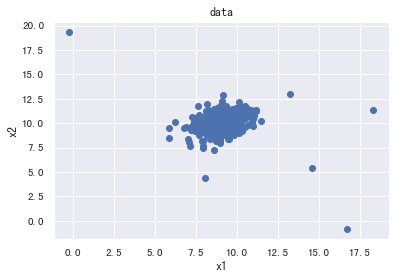

In [9]:
#load the data
import pandas as pd
import numpy as np
data = pd.read_csv('anomaly_data.csv')
#visualize the data
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(font='SimHei')
fig1 = plt.figure()
plt.scatter(data.loc[:, 'x1'], data.loc[:, 'x2'])
plt.title('data')
plt.xlabel('x1')
plt.ylabel('x2')

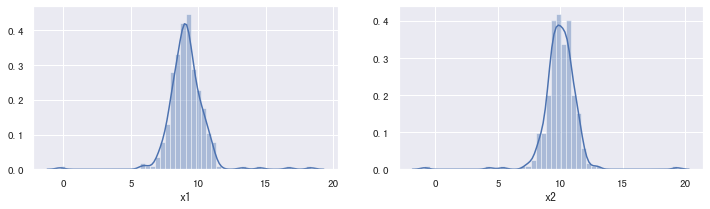

In [13]:
#define x1 and x2
x1 = data.loc[:, 'x1']
x2 = data.loc[:, 'x2']
#coding:utf-8
fig = plt.figure(figsize=(12, 3))
ax1 = plt.subplot(121)
sns.distplot(x1)
ax2 = plt.subplot(122)
sns.distplot(x2)

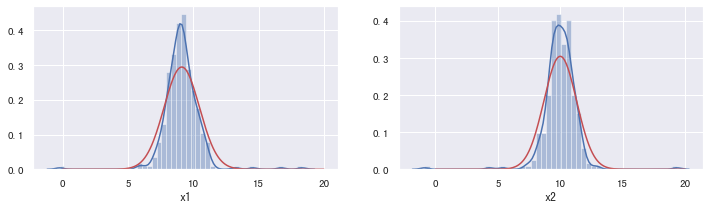

In [14]:
#calculate the gaussian distribution p(x)
from scipy.stats import norm
x_range = np.linspace(0, 20, 300)
x1_normal = norm.pdf(x_range, x1.mean(), x1.std())
x2_normal = norm.pdf(x_range, x2.mean(), x2.std())
ax1.plot(x_range, x1_normal, c='r')
ax2.plot(x_range, x2_normal, c='r')
fig

In [37]:
#establish the model and predict
from sklearn.covariance import EllipticEnvelope
ad_model = EllipticEnvelope(contamination=0.03)
ad_model.fit(data)
y_predict = ad_model.predict(data)
pd.value_counts(y_predict)

 1    297
-1     10
dtype: int64

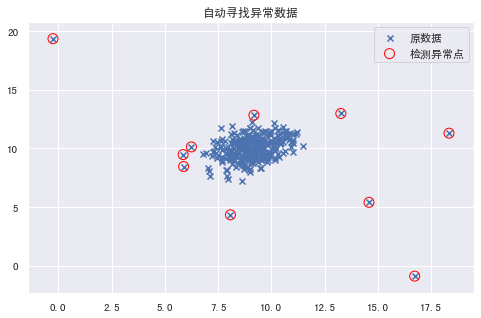

In [39]:
#visualize the result
fig2 = plt.figure(figsize=(8, 5))
orginal_data = plt.scatter(x1, x2, marker='x')
anomaly_data = plt.scatter(x1[y_predict == -1],
                           x2[y_predict == -1],
                           marker='o',
                           facecolor='none',
                           edgecolor='red',
                           s=100)
plt.title('自动寻找异常数据')
plt.legend((orginal_data, anomaly_data), ('原数据', '检测异常点'))